In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/brianjcurryjr/PredictingWeightFromHeight/master/height_weight.csv")
df.sample(5)

,Index,Height(Inches),Weight(Pounds)
8216,8217,65.33432,118.6681
13718,13719,68.46142,123.4447
8713,8714,66.21546,118.4718
19543,19544,70.13475,128.6143
5731,5732,65.89945,110.9553


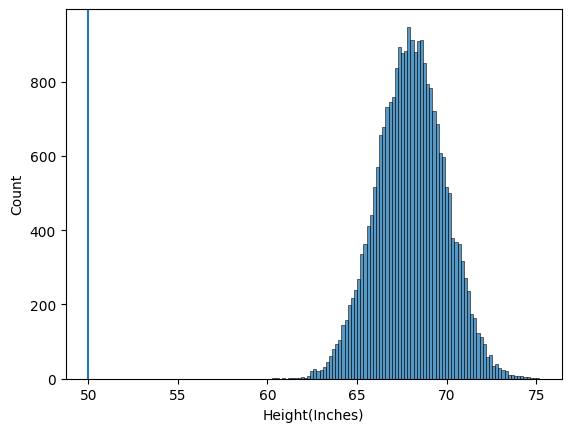

In [3]:
sns.histplot(data=df['Height(Inches)'])
plt.axvline(50)

<Axes: >

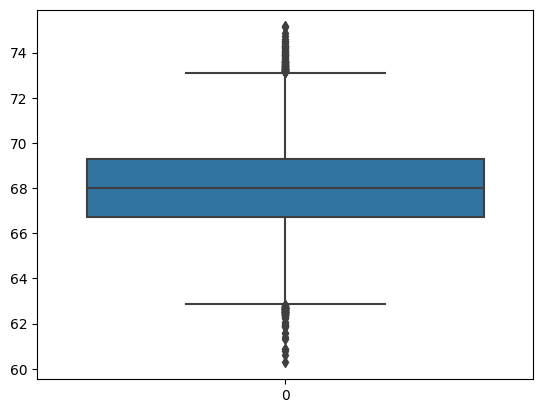

In [4]:
sns.boxplot(data=df['Height(Inches)'])

<Axes: xlabel='Weight(Pounds)', ylabel='Count'>

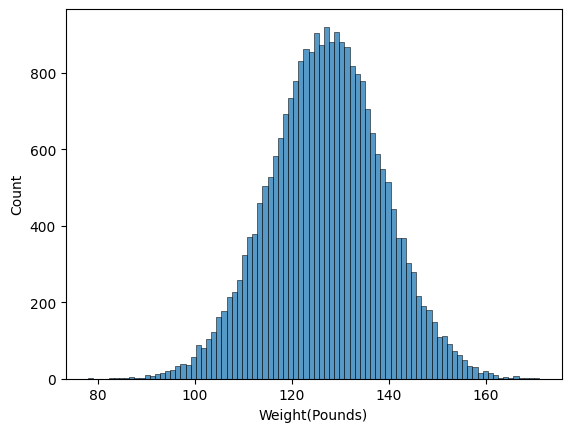

In [5]:
sns.histplot(data=df['Weight(Pounds)'])

<Axes: >

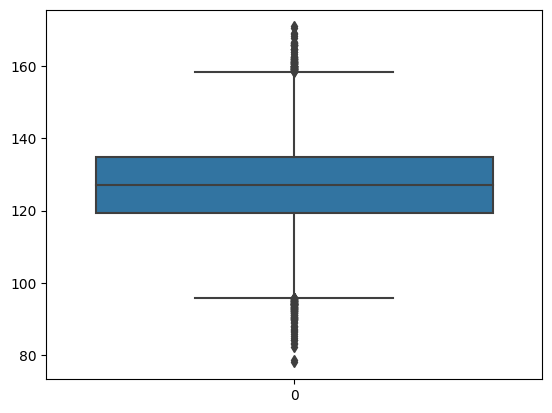

In [6]:
sns.boxplot(data=df['Weight(Pounds)'])

In [7]:
df_h = df
df_h["h"] = df_h["Height(Inches)"]
Q1_h, Q3_h = df_h["h"].quantile([0.25, 0.75])
IQR_h = Q3_h - Q1_h

filtered_h = df_h.query("(@Q1_h - 1.5 * @IQR_h) <= h <= (@Q3_h + 1.5 * @IQR_h)")
outliner_down_h = df_h.query("(@Q1_h - 1.5 * @IQR_h) > h")
outliner_up_h = df_h.query("h > (@Q3_h + 1.5 * @IQR_h)")
outliner_h = pd.concat([outliner_down_h, outliner_up_h])

print(f"{Q1_h=}, {Q3_h=}")
print(f"{filtered_h}")
print(f"{outliner_h}")

Q1_h=66.7043975, Q3_h=69.2729575
       Index  Height(Inches)  Weight(Pounds)         h
0          1        65.78331        112.9925  65.78331
1          2        71.51521        136.4873  71.51521
2          3        69.39874        153.0269  69.39874
3          4        68.21660        142.3354  68.21660
4          5        67.78781        144.2971  67.78781
...      ...             ...             ...       ...
24995  24996        69.50215        118.0312  69.50215
24996  24997        64.54826        120.1932  64.54826
24997  24998        64.69855        118.2655  64.69855
24998  24999        67.52918        132.2682  67.52918
24999  25000        68.87761        124.8742  68.87761

[24833 rows x 4 columns]
       Index  Height(Inches)  Weight(Pounds)         h
412      413        62.01666        109.0848  62.01666
1133    1134        62.75039        114.4900  62.75039
1244    1245        62.64242        100.1982  62.64242
2186    2187        62.60611        129.7600  62.60611
2237  

In [8]:
df_w = df
df_w["w"] = df_w["Weight(Pounds)"]
Q1_w, Q3_w = df_w["w"].quantile([0.25, 0.75])
IQR_w = Q3_w - Q1_w
filtered_w = df_w.query("(@Q1_w - 1.5 * @IQR_w) <= w <= (@Q3_w + 1.5 * @IQR_w)")
outliner_down_w = df_w.query("(@Q1_w - 1.5 * @IQR_w) > w")
outliner_up_w = df_w.query("w > (@Q3_w + 1.5 * @IQR_w)")
outliner_w = pd.concat([outliner_down_w, outliner_up_w], ignore_index=True)

print(f"{Q1_w=}, {Q3_w=}")
print(f"{filtered_w}")
print(f"{outliner_w}")

Q1_w=119.308675, Q3_w=134.89285
       Index  Height(Inches)  Weight(Pounds)         h         w
0          1        65.78331        112.9925  65.78331  112.9925
1          2        71.51521        136.4873  71.51521  136.4873
2          3        69.39874        153.0269  69.39874  153.0269
3          4        68.21660        142.3354  68.21660  142.3354
4          5        67.78781        144.2971  67.78781  144.2971
...      ...             ...             ...       ...       ...
24995  24996        69.50215        118.0312  69.50215  118.0312
24996  24997        64.54826        120.1932  64.54826  120.1932
24997  24998        64.69855        118.2655  64.69855  118.2655
24998  24999        67.52918        132.2682  67.52918  132.2682
24999  25000        68.87761        124.8742  68.87761  124.8742

[24809 rows x 5 columns]
     Index  Height(Inches)  Weight(Pounds)         h          w
0      250        65.93895        84.35980  65.93895   84.35980
1      294        69.13438        